Given a desired joint trajectory $\theta_d(t)$, the feedforward-PID control law is given as follows:
$$ u = \dot{\theta}(t) = \dot{\theta_d} + K_p \theta_e(t) + K_i \int_0^t \theta_e \text{d}t + K_d \dot{\theta}_e$$

where:

- $\dot{\theta}_d$ is the desired velocity;
- $\theta_e := \theta_d(t) - \theta(t)$ is the angle error;
- $K_p,\, K_i,\, K_d$ are the PID coefficients.

In [1]:
from robot_analysis.planar_nr import PlanarRobotNR, plot_final, animate_all
from robot_analysis.controller import FeedforwardPID
import numpy as np

links = {
    'l': [1.0, 1.0],  # Links lengths [m]
    'm': [1.0, 1.0],  # Links masses [kg]
    'b': [1.0, 1.0],  # Friction coefficients
    'tau_max': [50.0, 50.0],
}
robot = PlanarRobotNR(links)

Created robot with 2 link(s).
Kinematics: End effector positions are:
	xC=Matrix([[l1*cos(q1(t))], [l1*cos(q1(t)) + l2*cos(q1(t) + q2(t))]])
	y_C=Matrix([[l1*sin(q1(t))], [l1*sin(q1(t)) + l2*sin(q1(t) + q2(t))]])
Dynamics: M, C, G matrices are:
	M=Matrix([[1.0*l1**2*m1 + 1.0*m2*(l1**2 + 2*l1*l2*cos(q2(t)) + l2**2), 1.0*m2*(l1*l2*cos(q2(t)) + l2**2)], [1.0*l1*l2*m2*cos(q2(t)) + 1.0*l2**2*m2, 1.0*l2**2*m2]])
	C=Matrix([[1.0*b1*Derivative(q1(t), t) - 2.0*l1*l2*m2*sin(q2(t))*Derivative(q1(t), t)*Derivative(q2(t), t) - 1.0*l1*l2*m2*sin(q2(t))*Derivative(q2(t), t)**2], [1.0*b2*Derivative(q2(t), t) + 1.0*l1*l2*m2*sin(q2(t))*Derivative(q1(t), t)**2]])
	G=Matrix([[9.81*l1*m1*cos(q1(t)) + 9.81*l1*m2*cos(q1(t)) + 9.81*l2*m2*cos(q1(t) + q2(t))], [9.81*l2*m2*cos(q1(t) + q2(t))]])


In [ ]:
ff_pid = FeedforwardPID(
    setpoint=np.array([[np.pi / 6, np.pi / 3]]).T,
    t_step=robot.t_step,
    u_name='velocity',
    kP=np.array([[1.0, 1.0]]).T,
)
data = robot.simulate(controller=ff_pid)

u=[[0.52359878]
 [0.52359878]], q_next=[[0.00523599]
 [0.00523599]], dq_next=[[0.52359878]
 [0.52359878]]
u=[[0.52957978]
 [0.50761778]], q_next=[[-0.0006852 ]
 [ 0.02105718]], dq_next=[[0.52957978]
 [0.50761778]]
u=[[0.53555494]
 [0.49165076]], q_next=[[-0.00660062]
 [ 0.03686453]], dq_next=[[0.53555494]
 [0.49165076]]
u=[[0.54750128]
 [0.45972612]], q_next=[[-0.01842749]
 [ 0.06846991]], dq_next=[[0.54750128]
 [0.45972612]]
u=[[0.56425805]
 [0.41474277]], q_next=[[-0.0350167 ]
 [ 0.11300343]], dq_next=[[0.56425805]
 [0.41474277]]
u=[[0.5796829 ]
 [0.37206095]], q_next=[[-0.05028729]
 [ 0.15525843]], dq_next=[[0.5796829 ]
 [0.37206095]]
u=[[0.59986565]
 [0.31644885]], q_next=[[-0.07026821]
 [ 0.21031442]], dq_next=[[0.59986565]
 [0.31644885]]
u=[[0.61735671]
 [0.26653238]], q_next=[[-0.08758437]
 [ 0.25973172]], dq_next=[[0.61735671]
 [0.26653238]]
u=[[0.6323544 ]
 [0.22181299]], q_next=[[-0.10243208]
 [ 0.30400391]], dq_next=[[0.6323544 ]
 [0.22181299]]
u=[[0.64469854]
 [0.18268825]]

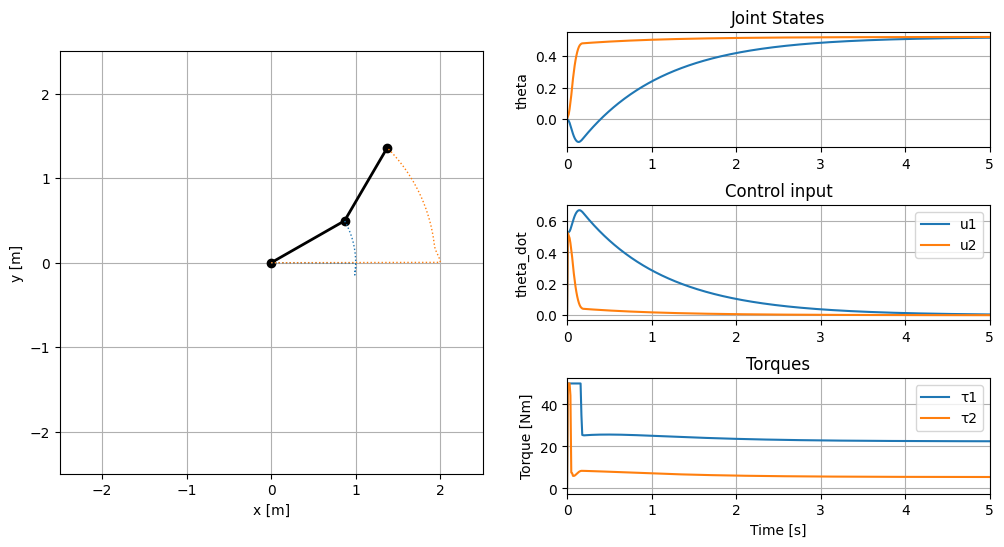

In [3]:
plot_final(robot)

In [4]:
robot.g_mat

array([[21.98848167],
       [ 4.94927896]])

In [5]:
robot.tau

array([[22.48332375],
       [ 5.46334492]])